# Group work - Assessment 2

In this assignment, we will focus on salary prediction. The data set for this assignment includes information on job descriptions and salaries. Use this data set to see if you can predict the salary of a job posting (i.e., the `Salary` column in the data set) based on the job description. This is important, because this model can make a salary recommendation as soon as a job description is entered into a system.

## Description of Variables

The description of variables are provided in "Jobs - Data Dictionary.docx"

## Goal

Use the **jobs_alldata.csv** data set and build models to predict **salary**.

**Be careful: this is a REGRESSION task**

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.


## Recommended roles for group members:

**Section 1:** to be completed by both group members

**Section 2:** first three models to be completed by the first group member and checked by the second; last two models to be completed by the second group members and checked by the first group member.

**Discussion:** to be completed by both group members

**Important notes:**
- Both group members will get the same grade. Therefore, you should check the work of your group member. If they make a mistake, you will be responsible for that mistake too.
- Both group members must put in their fair share of effort. Otherwise, those who don't contribute to the assignment will not receive any grade.


# Section 1: (8 points in total)

## Data Prep (6 points)

# Data prep

In [455]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Get data

In [456]:
jobs = pd.read_csv('jobs_alldata.csv')
jobs.head()

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel
0,67206,Civil Service Title: Regional Director Mental ...,Remote,5,2,3,0
1,88313,The New York City Comptrollerâ€™s Office Burea...,Remote,5,2,4,10-15
2,81315,With minimal supervision from the Deputy Commi...,East campus,5,3,3,5-10
3,76426,OPEN TO CURRENT BUSINESS PROMOTION COORDINATOR...,East campus,1,1,3,0
4,55675,Only candidates who are permanent in the Princ...,Southeast campus,1,1,3,5-10


# split the data into train and test

In [457]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(jobs, test_size=0.3)

In [458]:
train_set.isna().sum()

Salary             0
Job Description    0
Location           0
Min_years_exp      0
Technical          0
Comm               0
Travel             0
dtype: int64

In [459]:
test_set.isna().sum()

Salary             0
Job Description    0
Location           0
Min_years_exp      0
Technical          0
Comm               0
Travel             0
dtype: int64

In [460]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer

In [461]:
train = train_set
test = test_set

# Separate the target variable

In [462]:
train_y = train[['Salary']]
test_y = test[['Salary']]

train_jd = train['Job Description']
test_jd = test['Job Description']

train_inputs = train.drop(['Salary','Job Description'], axis=1)
test_inputs = test.drop(['Salary', 'Job Description'], axis=1)

## Feature Engineering (1 points)

Create one NEW feature from existing data. You either transform a single variable, or create a new variable from existing ones. 

Grading: 
- 0.5 points for creating the new feature correctly
- 0.5 points for the justification of the new feature (i.e., why did you create this new feature)

# Formula: All_Skills_rating = Min_years_exp + Technical + Comm

In [463]:
#Deriving a new column

def new_col(df):
    
    #Create a copy so that we don't overwrite the existing dataframe
    df1 = df.copy()

    # Use the formula
    df1['All_Skills_rating'] = (df1['Min_years_exp'] + df1['Technical'] + df1['Comm'])

    return df1[['All_Skills_rating']]
    # You can use this to check whether the calculation is made correctly:
    #return df1

In [464]:
#Let's test the new function:

# Send the train set to the function we created
new_col(train_inputs).head()

,All_Skills_rating
429,8
1185,10
2116,9
2127,12
458,5


In [465]:
#Adding feature engineering column to the train_inputs
train_inputs['All_Skills_rating'] = new_col(train_inputs)

In [466]:
train_inputs.dtypes

Location             object
Min_years_exp         int64
Technical             int64
Comm                  int64
Travel               object
All_Skills_rating     int64
dtype: object

In [467]:
#Adding feature engineering column to the test_inputs
test_inputs['All_Skills_rating'] = new_col(test_inputs)

In [468]:
test_inputs.dtypes

Location             object
Min_years_exp         int64
Technical             int64
Comm                  int64
Travel               object
All_Skills_rating     int64
dtype: object

In [469]:
train_inputs.shape,test_inputs.shape

((1689, 6), (724, 6))

# Feature Engineering column justification

In [470]:
# Higher value of All_Skills_rating column indicates the level of skills required for the job role and 
# this impacts the Salary column.

## Find the Baseline (1 point)

In [471]:
from sklearn.metrics import mean_squared_error

In [472]:
#First find the average value of the target

mean_value = np.mean(train_y['Salary'])

mean_value

78566.0307874482

In [473]:
# Predict all values as the mean

baseline_pred = np.repeat(mean_value, len(test_y))

baseline_pred

array([78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
      

In [474]:
baseline_mse = mean_squared_error(test_y, baseline_pred)

baseline_rmse = np.sqrt(baseline_mse)

print('Baseline RMSE: {}' .format(baseline_rmse))

Baseline RMSE: 28294.892856870818


In [475]:
train_y['Salary']

429      63407
1185    111372
2116     79054
2127     67864
458      88695
         ...  
1638     44366
1095     52753
1130     78345
1294     87196
860      74647
Name: Salary, Length: 1689, dtype: int64

# Identify the numerical and categorical columns

In [476]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [477]:
numeric_columns

['Min_years_exp', 'Technical', 'Comm', 'All_Skills_rating']

In [478]:
categorical_columns

['Location', 'Travel']

In [479]:
feat_eng_columns = ['Min_years_exp', 'Technical', 'Comm']

# Pipeline

In [480]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

my_new_column = Pipeline(steps=[('my_new_column', FunctionTransformer(new_col)),
                               ('scaler', StandardScaler())])

preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('trans', my_new_column, feat_eng_columns)],
        remainder='passthrough')

# Transform: fit_transform() for TRAIN

In [481]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-1.12955755,  0.59306224,  0.9780514 , ...,  0.        ,
         0.        , -0.18370241],
       [ 1.0979062 ,  0.59306224, -1.25579419, ...,  1.        ,
         0.        ,  0.66403903],
       [-1.12955755,  0.59306224,  2.09497419, ...,  0.        ,
         0.        ,  0.24016831],
       ...,
       [-1.12955755,  0.59306224, -1.25579419, ...,  0.        ,
         1.        , -1.03144385],
       [ 0.54104026, -0.23136749, -0.1388714 , ...,  0.        ,
         0.        ,  0.24016831],
       [-1.12955755, -0.23136749, -0.1388714 , ...,  0.        ,
         0.        , -1.03144385]])

In [482]:
train_x.shape

(1689, 14)

# Tranform: transform() for TEST

In [483]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[-1.12955755, -0.23136749, -0.1388714 , ...,  0.        ,
         0.        , -1.03144385],
       [ 0.54104026,  0.59306224, -2.37271699, ...,  0.        ,
         1.        , -0.18370241],
       [ 0.54104026,  0.59306224, -1.25579419, ...,  0.        ,
         0.        ,  0.24016831],
       ...,
       [-1.12955755, -0.23136749,  0.9780514 , ...,  0.        ,
         0.        , -0.60757313],
       [ 0.54104026,  2.24192171, -1.25579419, ...,  0.        ,
         0.        ,  1.08790976],
       [ 1.0979062 , -1.05579722,  0.9780514 , ...,  0.        ,
         0.        ,  0.66403903]])

In [484]:
test_x.shape

(724, 14)

# NLTP

In [485]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [486]:
train_jd.head()

429     Only candidates who are permanent in the Compu...
1185    NYCERS is seeking a Business Analyst with a te...
2116    The NYC Department of Environmental Protection...
2127    Only Candidates permanent in the Assistant Civ...
458     Please read this posting carefully to make cer...
Name: Job Description, dtype: object

In [487]:
#Create a blank list

new_train = []


# For each row in train_set, we will read the text, tokenize it, remove stopwords, lemmatize it, 
# and save it to the new list

for text in train_jd:
    text = re.sub(r'[!"#$%&()*+,-./:;<=>?[\]^_`{|}~]', ' ', text).lower()
        
    words= nltk.tokenize.word_tokenize(text)
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if len(w)>2 and w not in stopwords.words('english')]
        
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    new_train.append(' '.join(words))

In [488]:
# Let's convert the original train_set to a dataframe

train_set_df = pd.DataFrame(train_set)

train_set_df['new_text'] = new_train

train_set_df

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel,new_text
429,63407,Only candidates who are permanent in the Compu...,HQ,1,3,4,0,candidate permanent computer system manager ti...
1185,111372,NYCERS is seeking a Business Analyst with a te...,HQ,5,3,2,10-15,nycers seeking business analyst technical back...
2116,79054,The NYC Department of Environmental Protection...,HQ,1,3,5,0,nyc department environmental protection dep pr...
2127,67864,Only Candidates permanent in the Assistant Civ...,Southeast campus,5,4,3,0,candidate permanent assistant civil engineer t...
458,88695,Please read this posting carefully to make cer...,Remote,1,1,3,0,please read posting carefully make certain mee...
...,...,...,...,...,...,...,...,...
1638,44366,NYC Civilian Complaint Review Board The Civil...,HQ,2,3,3,0,nyc civilian complaint review board civilian c...
1095,52753,The NYC Department of Environmental Protection...,HQ,1,3,4,0,nyc department environmental protection dep en...
1130,78345,The NYC Office of Payroll Administration is re...,HQ,1,3,2,5-10,nyc office payroll administration recruiting i...
1294,87196,HPDTech is the IT division within HPD. Its mis...,Remote,4,2,3,0,hpdtech division within hpd mission identify a...


In [489]:
# Let's do the same for test data 

new_test = []

for text in test_jd:
    text = re.sub(r'[!"#$%&()*+,-./:;<=>?[\]^_`{|}~]', ' ', text).lower()
        
    words= nltk.tokenize.word_tokenize(text)
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if len(w)>2 and w not in stopwords.words('english')]
        
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    new_test.append(' '.join(words))


In [490]:
# Let's convert the original test_set to a dataframe

test_set_df = pd.DataFrame(test_set)

test_set_df['new_text'] = new_test

test_set_df

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel,new_text
765,149752,The New York City Housing Authority (NYCHA) is...,HQ,1,2,3,0,new york city housing authority nycha largest ...
2387,64653,"Hiring Rate: $62,272.00 (Flat Rate-Annual) ...",HQ,4,3,1,5-10,hiring rate flat rate annual mission bureau hi...
2162,69530,The Executive Director for Regulatory Reform w...,East campus,4,3,2,0,executive director regulatory reform assist im...
1833,51932,The NYC Department of Environmental Protection...,East campus,2,3,2,0,nyc department environmental protection dep pr...
1814,60218,The Department of Transportationâ€™s (DOT) mis...,East campus,2,2,2,0,department dot mission provide safe efficient ...
...,...,...,...,...,...,...,...,...
2333,58452,The Family Independence Administration/ Office...,HQ,5,4,1,0,family independence administration office rese...
998,90220,In order to be considered for this position ca...,West campus,5,2,3,0,order considered position candidate must servi...
891,68328,In accordance to Local Law 196 established in ...,Remote,1,2,4,0,accordance local law established late sb devel...
1866,92478,About New York City Cyber Command NYC Cyber Co...,Southeast campus,4,5,2,1-5,new york city cyber command nyc cyber command ...


# Use Scikit-Learn to create the term-by-doc matrix

In [491]:
#Preparing Text column
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english')

train_x_tr = tfidf_vect.fit_transform(train_set_df['new_text'])

In [492]:
test_x_tr = tfidf_vect.transform(test_set_df['new_text'])

In [493]:
train_x_tr.shape, test_x_tr.shape

((1689, 7601), (724, 7601))

In [494]:
train_x_tr.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Latent Semantic Analysis (Singular Value Decomposition)

In [495]:
from sklearn.decomposition import TruncatedSVD

In [496]:
#Though the recommended number of components is 100, Components = 900 is giving the accuracy that I am looking for
svd = TruncatedSVD(n_components=900, n_iter=10)

In [497]:
train_x_lsa = svd.fit_transform(train_x_tr)

In [498]:
#Checking the accuracy between old and new text
svd.explained_variance_.sum()

0.912923285274816

In [499]:
test_x_lsa = svd.transform(test_x_tr)

In [500]:
train_x_lsa.shape, test_x_lsa.shape

((1689, 900), (724, 900))

In [501]:
#numpy.column_stack() function is used to stack 1-D arrays as columns into a 2-D array.
#It takes a sequence of 1-D arrays and stack them as columns to make a single 2-D array. 
#2-D arrays are stacked as-is, just like with hstack function.

#Took reference from GeeksForGeeks website
#https://www.geeksforgeeks.org/numpy-column_stack-in-python/#:~:text=column_stack()%20in%20Python,-Last%20Updated%20%3A%2006&text=06%20Jan%2C%202019-,numpy.,a%20single%202%2DD%20array.

train_x_f = np.column_stack((train_x, train_x_lsa))
test_x_f = np.column_stack((test_x, test_x_lsa))

In [502]:
#Originally, we have 13 columns after transformation. Additional 900 is the components
#that we added in SVD and remaining one coulumn is the feature engineering column. So, total is 914 columns.

train_x_f.shape, test_x_f.shape

((1689, 914), (724, 914))

In [503]:
train_x_f

array([[-1.12955755e+00,  5.93062241e-01,  9.78051400e-01, ...,
         2.10066276e-02,  2.54190553e-03,  9.33061728e-03],
       [ 1.09790620e+00,  5.93062241e-01, -1.25579419e+00, ...,
        -2.69833610e-02,  1.25536820e-02, -3.83894005e-03],
       [-1.12955755e+00,  5.93062241e-01,  2.09497419e+00, ...,
         1.04969676e-02, -5.53207241e-03, -1.33599972e-03],
       ...,
       [-1.12955755e+00,  5.93062241e-01, -1.25579419e+00, ...,
        -4.63752472e-03, -6.26138321e-03,  1.14273150e-03],
       [ 5.41040262e-01, -2.31367492e-01, -1.38871395e-01, ...,
        -2.59409649e-04,  2.21338577e-03, -2.40872348e-04],
       [-1.12955755e+00, -2.31367492e-01, -1.38871395e-01, ...,
        -2.45485968e-02, -6.72106191e-03, -2.24047983e-02]])

# Section 2: (7 points in total)

Build the following models:


## Decision Tree: (1 point)

In [504]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(min_samples_leaf = 5) 

tree_reg.fit(train_x_f, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [505]:
#Train RMSE
train_pred = tree_reg.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 8557.589931368513


In [506]:
#Test RMSE
test_pred = tree_reg.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 22736.253615259124


# More regularization

In [507]:
#Let's restrict the depth as well

tree_reg2 = DecisionTreeRegressor(min_samples_leaf = 5, max_depth=9) 

tree_reg2.fit(train_x_f, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [508]:
#Train RMSE
train_pred = tree_reg2.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 14927.460359323686


In [509]:
#Test RMSE
test_pred = tree_reg2.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 21729.214985989558


In [510]:
train_error = []
test_error = []

for x in range(1,31):
    tree_reg3 = DecisionTreeRegressor(max_depth=x)
    tree_reg3.fit(train_x_f, train_y)
    reg_train_predictions = tree_reg3.predict(train_x_f)
    reg_test_predictions = tree_reg3.predict(test_x_f)
    train_rmse = round(np.sqrt(mean_squared_error (train_y, reg_train_predictions)),4)
    test_rmse = round(np.sqrt(mean_squared_error (test_y, reg_test_predictions)),4)
    print('# Max depth = {}'.format(x) + "     " +'Train RMSE = {}'.format(train_rmse) + "   "
         'Test RMSE = {}'.format(test_rmse))
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)

# Max depth = 1     Train RMSE = 28012.1019   Test RMSE = 27220.6129
# Max depth = 2     Train RMSE = 26792.2037   Test RMSE = 26793.9856
# Max depth = 3     Train RMSE = 25602.0399   Test RMSE = 26419.4344
# Max depth = 4     Train RMSE = 24422.9618   Test RMSE = 25250.6478
# Max depth = 5     Train RMSE = 23213.9422   Test RMSE = 24343.5532
# Max depth = 6     Train RMSE = 21644.2733   Test RMSE = 24323.2437
# Max depth = 7     Train RMSE = 19833.75   Test RMSE = 23225.5081
# Max depth = 8     Train RMSE = 18066.4886   Test RMSE = 21597.7416
# Max depth = 9     Train RMSE = 16069.235   Test RMSE = 22198.6526
# Max depth = 10     Train RMSE = 14517.2358   Test RMSE = 22591.4876
# Max depth = 11     Train RMSE = 13428.6013   Test RMSE = 22935.2465
# Max depth = 12     Train RMSE = 12198.9502   Test RMSE = 21210.9728
# Max depth = 13     Train RMSE = 11054.1863   Test RMSE = 21668.5756
# Max depth = 14     Train RMSE = 9962.3402   Test RMSE = 22308.1236
# Max depth = 15     Train RMSE =

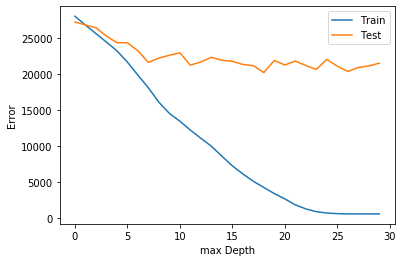

In [511]:
from matplotlib import pyplot as plt

plt.plot(train_error, label='Train')
plt.plot(test_error, label='Test')
plt.xlabel("max Depth")
plt.ylabel("Error")
plt.legend()

## Voting regressor (2 points):

The voting regressor should have at least 3 individual models

In [512]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import VotingRegressor


dtree_reg = DecisionTreeRegressor(max_depth=20)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.01, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), ('svr', svm_reg), ('sgd', sgd_reg)],
                        weights=[0.5, 0.3, 0.2])

voting_reg.fit(train_x_f, train_y)

C:\Users\Anoop\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=20,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best')),
                            ('svr

In [513]:
#Train RMSE
train_pred = voting_reg.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 11167.992267779264


In [514]:
#Test RMSE
test_pred = voting_reg.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 18190.6056738363


## A Boosting model: (1 point)

Build either an Adaboost or a GradientBoost model

In [515]:
#GradientBoosting

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1) 

gb_reg.fit(train_x_f, train_y)

C:\Users\Anoop\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [516]:
#Train RMSE
train_pred = gb_reg.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 17611.102943890503


In [517]:
#Test RMSE
test_pred = gb_reg.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 21014.759502613615


## Neural network: (1 point)

In [518]:
from sklearn.neural_network import MLPRegressor

#Default settings create 1 hidden layer with 100 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

mlp_reg.fit(train_x_f, train_y)


C:\Users\Anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [519]:
#Train RMSE
train_pred = mlp_reg.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 56016.17241699511


In [520]:
#Test RMSE
test_pred = mlp_reg.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 54058.007225801004


# Deep Neural Network

In [521]:
#values with regular Neural Network are very bad. Trying Deep Neural Network
dnn_reg = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50),
                       max_iter=1000)

dnn_reg.fit(train_x_f, train_y)

C:\Users\Anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [522]:
#Train RMSE
train_pred = dnn_reg.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 918.5957879849074


In [523]:
#Test RMSE
test_pred = dnn_reg.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 18651.23634385771


# Early Stopping

In [524]:
dnn_reg = MLPRegressor(hidden_layer_sizes=(50,50,50),
                       max_iter=1000,
                       early_stopping=True)

dnn_reg.fit(train_x_f, train_y)

C:\Users\Anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [525]:
#Train RMSE
train_pred = dnn_reg.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 10015.291302741867


In [526]:
#Test RMSE
test_pred = dnn_reg.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 17770.787448580115


## Grid search (2 points)

Perform either a full or randomized grid search on any model you want. There has to be at least two parameters for the search. 

In [527]:
#Randomized Grid Search
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'min_samples_leaf': np.arange(10, 30), 
     'max_depth': np.arange(10,30)}
  ]

tree_reg = DecisionTreeRegressor()

grid_search = RandomizedSearchCV(tree_reg, param_grid, cv=5, n_iter=10,
                           scoring='neg_mean_squared_error', verbose=1,
                           return_train_score=True)

grid_search.fit(train_x_f, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [528]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

27254.96121090102 {'min_samples_leaf': 10, 'max_depth': 13}
26890.112556274144 {'min_samples_leaf': 21, 'max_depth': 11}
27722.072513243707 {'min_samples_leaf': 23, 'max_depth': 19}
27322.78631472362 {'min_samples_leaf': 29, 'max_depth': 22}
27435.481159956646 {'min_samples_leaf': 24, 'max_depth': 21}
27274.808463308436 {'min_samples_leaf': 17, 'max_depth': 11}
26988.924967018458 {'min_samples_leaf': 21, 'max_depth': 26}
27205.58117183476 {'min_samples_leaf': 11, 'max_depth': 16}
27171.550546838826 {'min_samples_leaf': 27, 'max_depth': 19}
27344.71864199888 {'min_samples_leaf': 17, 'max_depth': 21}


In [529]:
grid_search.best_params_

{'min_samples_leaf': 21, 'max_depth': 11}

In [530]:
grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=21, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [531]:
#Train RMSE
train_pred = grid_search.best_estimator_.predict(train_x_f)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 19025.849902106867


In [532]:
#Test RMSE
test_pred = grid_search.best_estimator_.predict(test_x_f)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 25302.228880648116


# Discussion (5 points in total)


## List the train and test values of each model you built (2 points)

# Which model performs the best and why? (0.5 points) 

# How does it compare to baseline? (0.5 points)

Hint: The best model is the one that has the highest TEST score (regardless of any of the training values). If you select your model based on TRAIN values, you will lose points.

## Is there any evidence of overfitting in the best model, why or why not? If there is, what did you do about it? (1 point)

## Is there any overfitting in the other models (besides the best model), why or why not? If there is, what did you do about it? (1 point)